In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Fraud.csv')

In [ ]:
df.head(
)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736848 entries, 0 to 736847
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            736848 non-null  int64  
 1   type            736848 non-null  object 
 2   amount          736848 non-null  float64
 3   nameOrig        736847 non-null  object 
 4   oldbalanceOrg   736847 non-null  float64
 5   newbalanceOrig  736847 non-null  float64
 6   nameDest        736847 non-null  object 
 7   oldbalanceDest  736847 non-null  float64
 8   newbalanceDest  736847 non-null  float64
 9   isFraud         736847 non-null  float64
 10  isFlaggedFraud  736847 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 61.8+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,736848.000000,7.368480e+05,7.368470e+05,7.368470e+05,7.368470e+05,7.368470e+05,736847.000000,736847.0
mean,19.302760,1.638421e+05,8.753709e+05,8.956310e+05,9.811505e+05,1.137452e+06,0.000584,0.0
std,9.246904,2.696256e+05,2.938818e+06,2.975823e+06,2.317074e+06,2.459709e+06,0.024150,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,13.000000,1.295395e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,17.000000,7.874358e+04,1.665300e+04,0.000000e+00,1.209578e+05,2.185865e+05,0.000000,0.0
75%,22.000000,2.193005e+05,1.496120e+05,1.902127e+05,9.075471e+05,1.178238e+06,0.000000,0.0
max,38.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.148270e+07,4.148270e+07,1.000000,0.0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,1
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
# prompt: remove null values

df = df.dropna()
print(df.isnull().sum())


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
#payment type

print(df['type'].unique())


['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


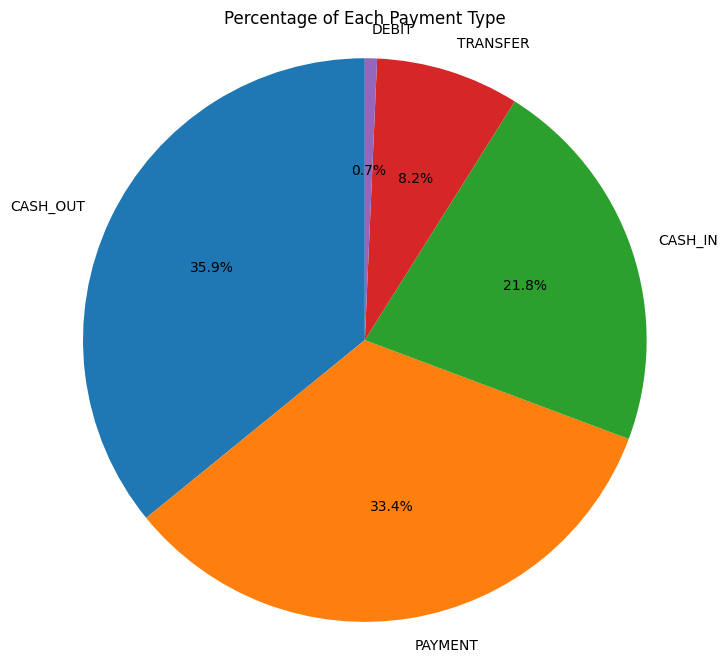

In [ ]:
#Percentage  of each payment type in pie chart

# Calculate the percentage of each payment type
payment_type_counts = df['type'].value_counts(normalize=True) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_type_counts, labels=payment_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Each Payment Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
# Group by 'type' and calculate the sum of 'amount' for each type
grouped_df = df.groupby('type')['amount'].sum()

grouped_df


,amount
type,
CASH_IN,2.763573e+10
CASH_OUT,4.934839e+10
DEBIT,3.046444e+07
PAYMENT,2.883799e+09
TRANSFER,4.082833e+10


In [ ]:
# Count the number of legitimate and fraudulent transactions
legit_transactions = len(df[df['isFraud'] == 0])
fraud_transactions = len(df[df['isFraud'] == 1])

# Calculate the percentage of legitimate and fraudulent transactions
total_transactions = len(df)
legit_percentage = (legit_transactions / total_transactions) * 100
fraud_percentage = (fraud_transactions / total_transactions) * 100

print(f"Number of Legit Transactions: {legit_transactions}")
print(f"Number of Fraudulent Transactions: {fraud_transactions}")
print(f"Percentage of Legit Transactions: {legit_percentage:.2f}%")
print(f"Percentage of Fraudulent Transactions: {fraud_percentage:.2f}%")

Number of Legit Transactions: 736417
Number of Fraudulent Transactions: 430
Percentage of Legit Transactions: 99.94%
Percentage of Fraudulent Transactions: 0.06%


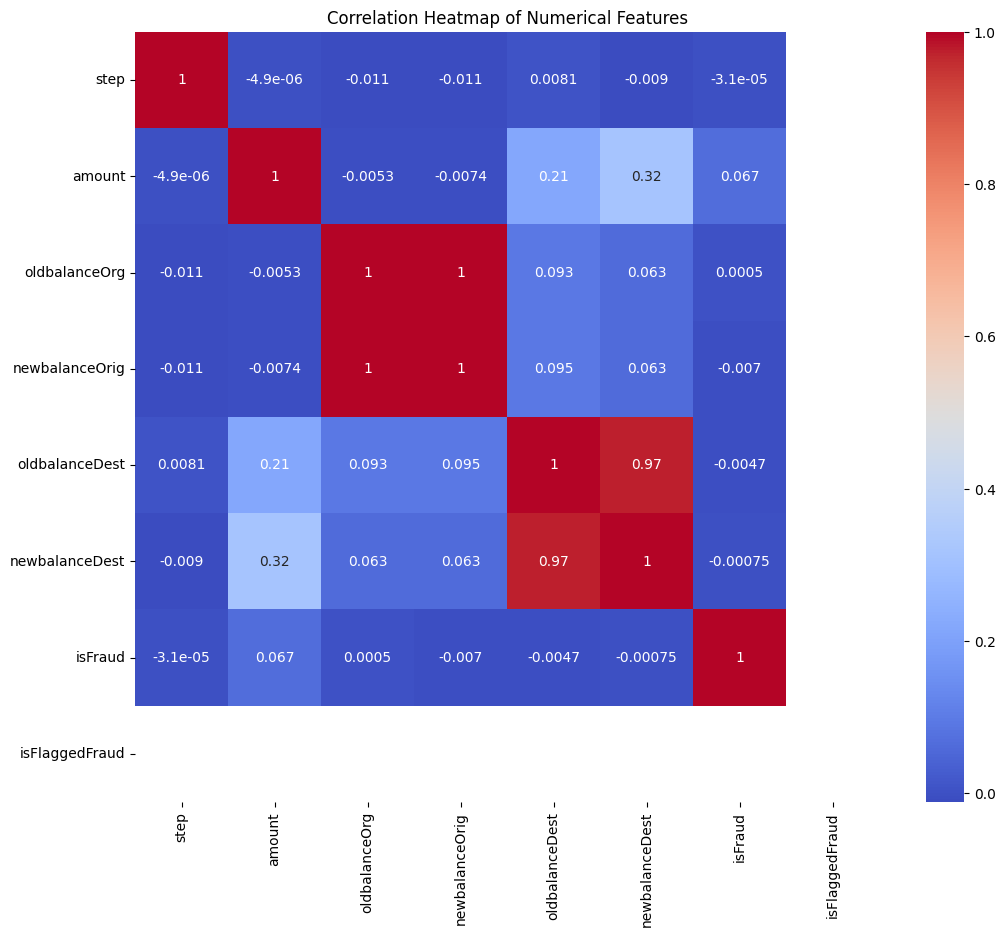

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
#show which features are multi collenear

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Set a threshold for multicollinearity
threshold = 0.8

# Find pairs of features with correlation above the threshold
multicollinear_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            multicollinear_features.add(colname)

# Print the multicollinear features
print("Multicollinear Features:")
for feature in multicollinear_features:
    print(feature) # Added indentation to print the feature

Multicollinear Features:
newbalanceOrig
newbalanceDest


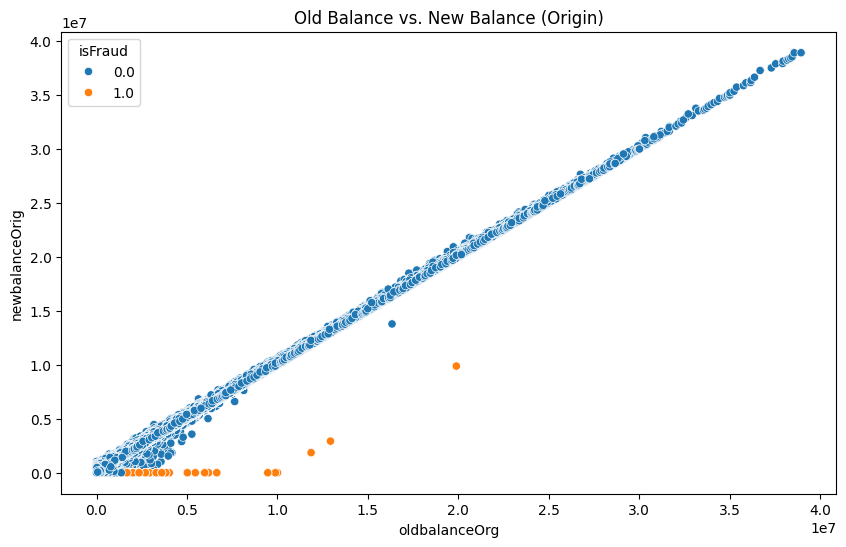

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


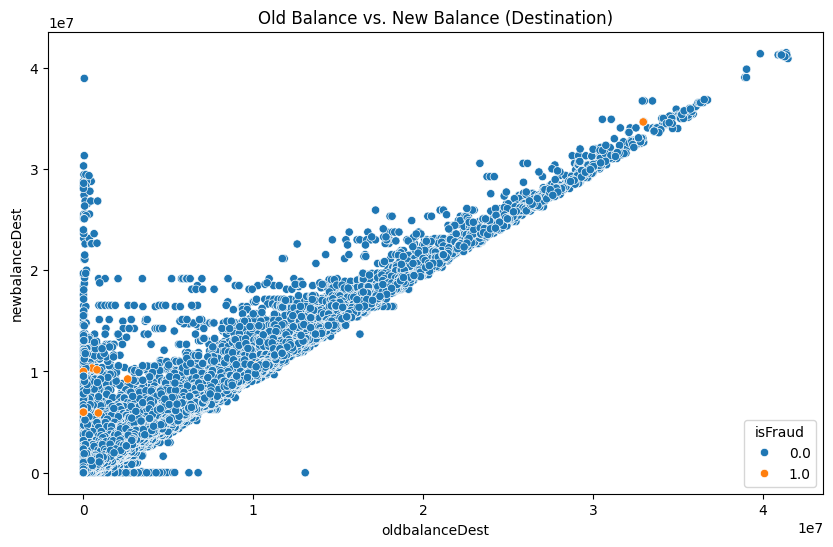

In [ ]:
#realtion between new balance dataset and old balance dataset

# Plotting oldbalanceOrg vs newbalanceOrig
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', data=df, hue='isFraud')
plt.title('Old Balance vs. New Balance (Origin)')
plt.show()

# Plotting oldbalanceDest vs newbalanceDest
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceDest', y='newbalanceDest', data=df, hue='isFraud')
plt.title('Old Balance vs. New Balance (Destination)')
plt.show()


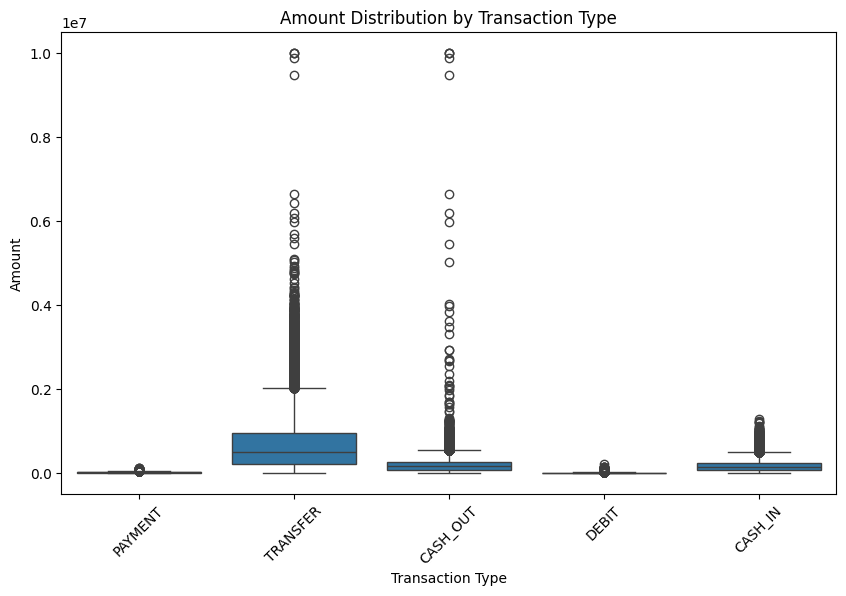

In [ ]:
# Box plots for amount by transaction type
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='amount', data=df)
plt.title('Amount Distribution by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

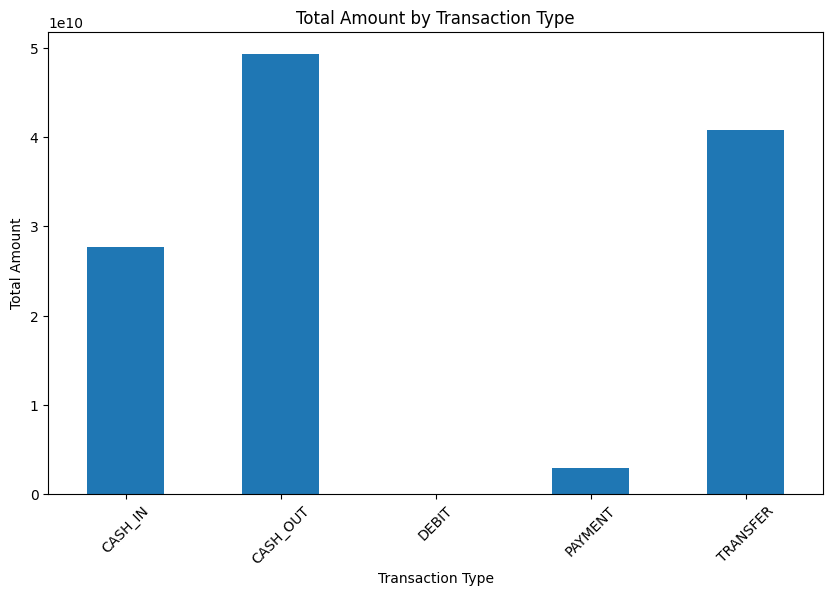

In [ ]:
#Bar chart for Total Amount by Transaction Type
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.title('Total Amount by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


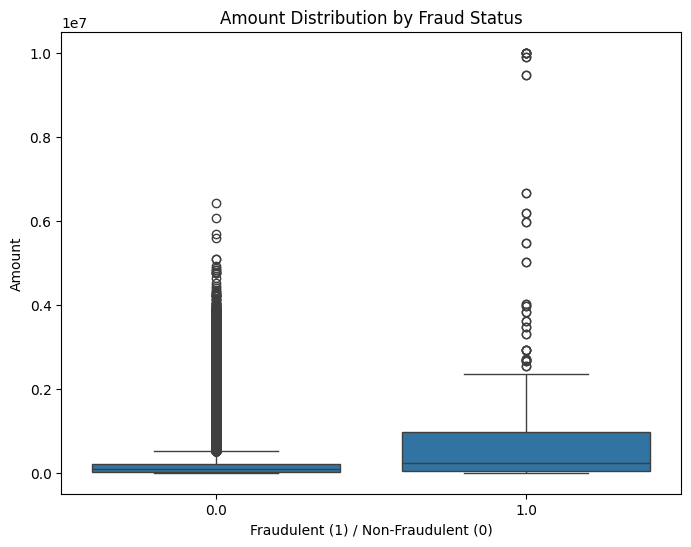

In [ ]:
# Boxplot comparison of 'amount' for fraud vs. non-fraud
plt.figure(figsize=(8, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Amount Distribution by Fraud Status')
plt.xlabel('Fraudulent (1) / Non-Fraudulent (0)')
plt.ylabel('Amount')
plt.show()

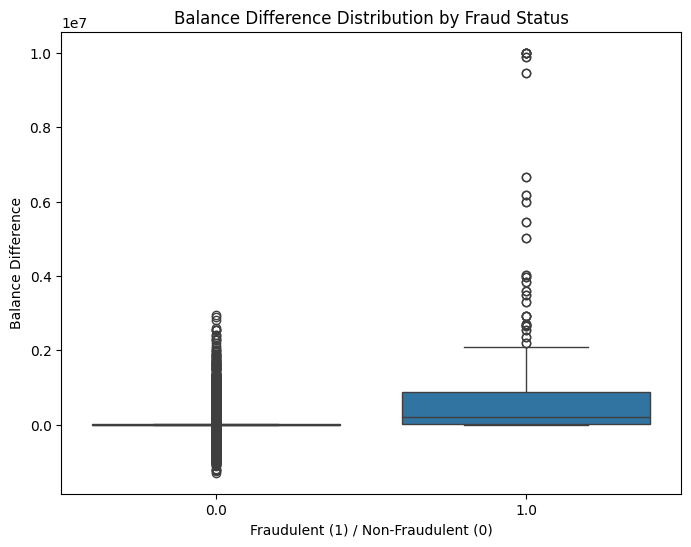

In [ ]:
# Difference between old balance and new balance
# Calculate the difference and create a new column
df['balance_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']

# Create a boxplot for 'balance_diff' grouped by 'isFraud'
plt.figure(figsize=(8, 6))
sns.boxplot(x='isFraud', y='balance_diff', data=df) # Now df has 'balance_diff'
plt.title('Balance Difference Distribution by Fraud Status')
plt.xlabel('Fraudulent (1) / Non-Fraudulent (0)')
plt.ylabel('Balance Difference')
plt.show()

Number of outliers in 'amount': 38011


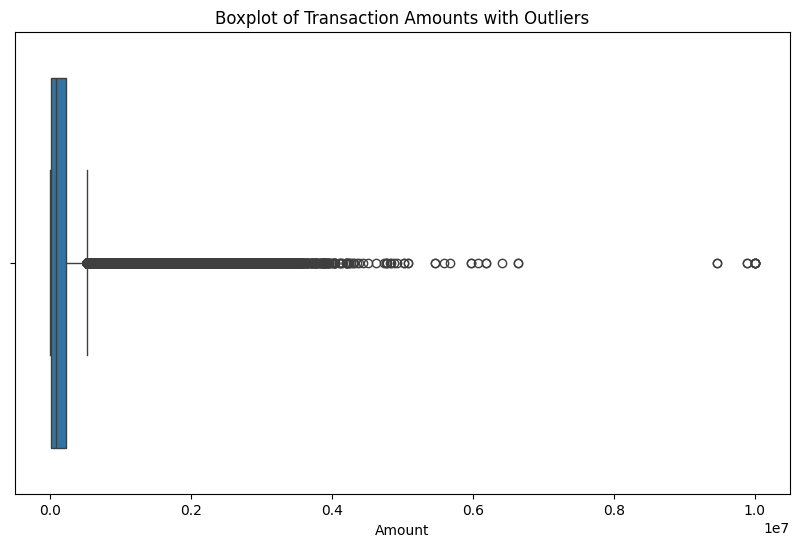

In [ ]:
#find outliers in the dataset

# Calculate the IQR for the 'amount' column
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]

# Print the number of outliers
print(f"Number of outliers in 'amount': {len(outliers)}")

#visualize the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='amount', data=df)
plt.title('Boxplot of Transaction Amounts with Outliers')
plt.xlabel('Amount')
plt.show()




In [ ]:
#Remove the outliers from your dataset:
df_no_outliers = df[(df['amount'] >= lower_bound) & (df['amount'] <= upper_bound)]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Encoding categorical feature 'type'
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Feature Selection (select relevant features for modeling)
# *** Selecting 'isFraud' before dropping null values to ensure it is included in y ***
y = df['isFraud']
X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1) # 'nameOrig', 'nameDest' are not relevant for prediction


# Splitting the dataset before dropping null values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# *** Dropping null values from training and testing sets separately ***
X_train = X_train.dropna()
X_test = X_test.dropna()
y_train = y_train[X_train.index]  # Align y_train with X_train after dropping NaNs
y_test = y_test[X_test.index]    # Align y_test with X_test after dropping NaNs

# Model Training and Evaluation
# 1. Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
print("Decision Tree Classifier:")
print(classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print(f"Accuracy: {accuracy_score(y_test, dt_pred)}")


# 2. Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
print("\nRandom Forest Classifier:")
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(f"Accuracy: {accuracy_score(y_test, rf_pred)}")

# 3. Logistic Regression
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train, y_train)
logreg_pred = logreg_classifier.predict(X_test)
print("\nLogistic Regression:")
print(classification_report(y_test, logreg_pred))
print(confusion_matrix(y_test, logreg_pred))
print(f"Accuracy: {accuracy_score(y_test, logreg_pred)}")

Decision Tree Classifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    147286
         1.0       0.67      0.60      0.63        84

    accuracy                           1.00    147370
   macro avg       0.83      0.80      0.81    147370
weighted avg       1.00      1.00      1.00    147370

[[147261     25]
 [    34     50]]
Accuracy: 0.9995996471466377

Random Forest Classifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    147286
         1.0       0.98      0.56      0.71        84

    accuracy                           1.00    147370
   macro avg       0.99      0.78      0.86    147370
weighted avg       1.00      1.00      1.00    147370

[[147285      1]
 [    37     47]]
Accuracy: 0.9997421456198684

Logistic Regression:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    147286
         1.0       0.73      0.19 

In [ ]:
#show which of the model is best

# Assuming you want to compare the models based on accuracy
models = {
    "Decision Tree": dt_classifier,
    "Random Forest": rf_classifier,
    "Logistic Regression": logreg_classifier
}

best_model = None
best_accuracy = 0

for name, model in models.items():
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name

print(f"\nBest Model: {best_model} with Accuracy: {best_accuracy}")


Decision Tree Accuracy: 0.9996675035624618
Random Forest Accuracy: 0.9997896451109453
Logistic Regression Accuracy: 0.999538576372396

Best Model: Random Forest with Accuracy: 0.9997896451109453


In [ ]:
#check if the model is overfit

# Training and testing accuracy scores
train_accuracy = dt_classifier.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, dt_pred)


print(f"Decision Tree - Training Accuracy: {train_accuracy}")
print(f"Decision Tree - Testing Accuracy: {test_accuracy}")

train_accuracy = rf_classifier.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, rf_pred)

print(f"Random Forest - Training Accuracy: {train_accuracy}")
print(f"Random Forest - Testing Accuracy: {test_accuracy}")

train_accuracy = logreg_classifier.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, logreg_pred)

print(f"Logistic Regression - Training Accuracy: {train_accuracy}")
print(f"Logistic Regression - Testing Accuracy: {test_accuracy}")




Decision Tree - Training Accuracy: 1.0
Decision Tree - Testing Accuracy: 0.9996675035624618
Random Forest - Training Accuracy: 1.0
Random Forest - Testing Accuracy: 0.9997896451109453
Logistic Regression - Training Accuracy: 0.9995300919289472
Logistic Regression - Testing Accuracy: 0.999538576372396


For data cleaning, I would first check for missing values and remove any rows with missing- values. I would then check for outliers in the amount column and remove any extreme values that do not fall within a certain range.

I would use a supervised machine learning model, such as Random Forest,Decision Tree or logistic regression to classify transactions as fraudulent or non-fraudulent.

I would select variables to be included in the model based on their correlation with the target variable (isFraud) and their importance in detecting fraud. Variables such as type, amount, and the initial and final balances of both the customer and the recipient would be important for the model.

I would use metrics such as precision, recall, F1 score, accuracy to evaluate the performance of the model. I would also use cross-validation to ensure that the model is not overfitting to the training data.

The key factors that predict fraudulent customers would likely include high transaction amounts, sudden changes in account balances, and transactions involving multiple parties.

These factors make sense as they are indicative of suspicious or unusual activity that may be indicative of fraud. High transaction amounts and sudden changes in account balances may be indicative of an attempt to steal funds, while transactions involving multiple parties may be indicative of money laundering or other illegal activities.

To prevent fraud, the company could implement measures such as transaction monitoring, account monitoring, and two-factor authentication. Additionally, the company could also train its employees to identify and report suspicious activity.

To determine if these actions are effective, the company could track the number of fraudulent transactions before and after the implementation of these measures. Additionally, the company could also conduct regular audits and assessments to identify any areas where the system may be vulnerable to fraud.